# Some Exercises to implement Pandas functionality in Numpy

In [66]:
# Data

import numpy as np
import pandas as pd

X = np.random.randn(100, 3)
X = np.hstack([X, (X[:,0] + 0.5 * np.random.randn(100)).reshape(-1, 1)]) # correlated variable
X[np.random.uniform(low=0, high=1, size=X.shape) < 0.01] = np.nan # add NaNs

df = pd.DataFrame(X, columns=[f"F{i}" for i in range(X.shape[1])])
df.head()

,F0,F1,F2,F3
0,0.501595,-0.981152,-0.195478,0.766600
1,-0.720401,-0.917118,-1.436942,-0.477504
2,-0.765944,0.686679,-0.311043,-0.970970
3,-0.196118,0.165628,1.935702,-0.775140
4,-0.327880,1.228247,0.420124,-0.585357


# DropNA

In [90]:
keep_idx = np.isnan(X).sum(axis=1) == 0 # boolean index for rows that don't have any nans

X = X[keep_idx]
df = df.dropna()

print("Same as pandas dropna: ", np.array_equal(X, df))

Same as pandas dropna:  True


# Standardization

In [140]:
mean = X.sum(axis=0) / len(X)
std = (((X - mean)**2).sum(axis=0) / len(X)) ** 0.5

Z = (X - mean) / std

from sklearn.preprocessing import StandardScaler

print("Same as sklearn StandardScaler:", np.isclose(Z, StandardScaler().fit_transform(df)).all())

Same as sklearn StandardScaler: True


# Correlation Matrix
$\rho = \frac{cov(x, y)}{\sigma_x \sigma_y}$
- Same as cov on standardised data
- Describing pop stastistic so divide by $N$

In [143]:
X_ = X - X.mean(axis=0) 
cov = (X_.T @ X_) / len(X) 
std = X_.std(axis=0).reshape(1, -1).repeat(len(cov), axis=0)
corr = cov / (std * std.T)

print("Same as pandas corr: ", np.isclose(corr, df.corr()).all() and )

Same as pandas corr:  True


# Histogram

<BarContainer object of 17 artists>

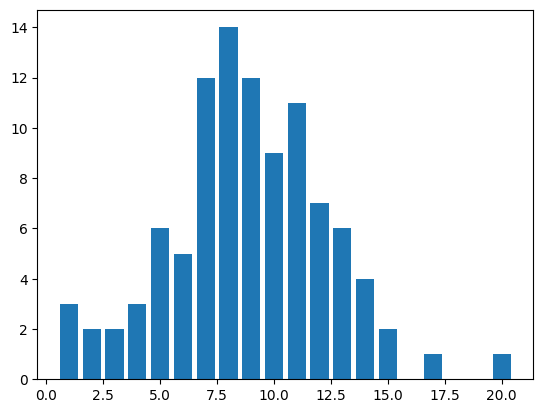

In [337]:
x = np.random.randn(100)
n_bins = 20
bins = np.linspace(x.min(), x.max(), n_bins).reshape(1, -1)

# True for every bin x is larger than - number of those bins equals the next bin's index!
# vectorised comparison [100, 1] with [1, 20]
bin_nr = (x.reshape(-1, 1) >= bins.reshape(1, -1)).sum(axis=1)

from collections import Counter
bin_count = Counter(bin_nr)
bin_count = dict(sorted(bin_count.items()))

import matplotlib.pyplot as plt
plt.bar(bin_count.keys(), bin_count.values())

# Moving Average
- Can use convolve, cumsum or a few shifting

In [192]:
# Adding the same numpy array to iself but shifed. A bit cryptic, but basically a generalisation of X[2:] + X[1:-1] etc
window = 5
res = 0
for w in range(window):
    res += X[window - w - 1: len(X) - w]
res /= window
    
print("Shifting same as pd.rolling:", np.isclose(res, df.rolling(window).mean().dropna()).all())

Shifting same as pd.rolling: True


In [300]:
window = 2
cumsum = X.cumsum(axis=0)
res = (cumsum[window:] - cumsum[:-window]) / window 

print("Cumsum diff same as pd.rolling:", np.isclose(res, df.rolling(window).mean().dropna().iloc[1:]).all())

Cumsum diff same as pd.rolling: True


# GroupBy

In [302]:
cat_col = np.random.choice(["A", "B", "C"], len(X))

In [306]:
res = np.vstack([X[cat_col == group].mean(axis=0) for group in sorted(set(cat_col))])

print("Manual groupby same as df.groupby:", np.isclose(res, df.groupby(cat_col).mean()).all())

Manual groupby same as df.groupby: True
